<a href="https://colab.research.google.com/github/ekrell/ams_ai_shortcourse_2024/blob/main/modules/xai_tabular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AMS AI Short Course: Intro to XAI

**Part 1: Tabular Models**

This Colab Notebook demonstrates using XAI methods to explain tabular models.

Atmospheric science datasets are often highly imbalanced and highly correlated. This notebook demonstrates how both of these can be pitfalls for explainability.

**Examples:**

- [Filipiak et al., Random Forest models for probabilistic forecasting](https://journals.ametsoc.org/view/journals/aies/2/3/AIES-D-22-0080.1.xml)
- [Adrianto et al., Tornado detection (example of imbalanced data)](https://asmedigitalcollection.asme.org/ebooks/book/149/chapter-abstract/30607/Machine-Learning-Techniques-for-Imbalanced-Data-An?redirectedFrom=fulltext)
- [Chen et al., combining meteorological and landscape features for regional prediction of hourly air temp (with XAI analysis)](https://www.sciencedirect.com/science/article/pii/S0048969722038347?casa_token=l-xm9kf1mXwAAAAA:rSjMmXhzBsAj2yP5lMz2rXY6yjk5JhWr3CCwGvSTPhMt9R13ANjY0aHs73f3F2pAyz4NrxNcDw)

**Goal:**
  - Given:
    - 800 atmospheric features for a point location (KRAS airport on the South Texas Gulf Coast)
  - Predict:
    - Probability of visibility < 1600 meters, 24-hour lead time

**XAI Methods:**

- Permutation Feature Importance (PFI)
- Shapley Additive ExPlanations (SHAP)
- PartitionSHAP


# Motivation

## Model Debugging

# Explainable Artificial Intelligence (XAI)

Explaining black-box models using post-hoc XAI methods!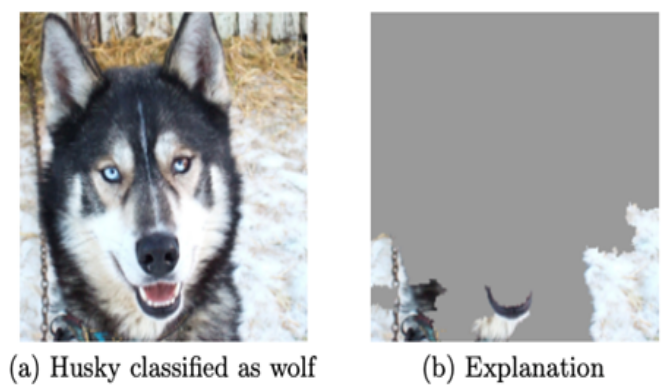

- Model trained to classify images as either _wolf_ or _husky_.
- Model performs very well based on independent test set.
- But XAI reveals something: using background pixels instead of animal.
- Why? Many wolf photos on google images have snow in background.
- XAI detected dataset bias

[Ribeiro, Marco Tulio, Sameer Singh, and Carlos Guestrin. "" Why should i trust you?" Explaining the predictions of any classifier." Proceedings of the 22nd ACM SIGKDD international conference on knowledge discovery and data mining. 2016.](https://dl.acm.org/doi/abs/10.1145/2939672.2939778)

## Scientific Insights

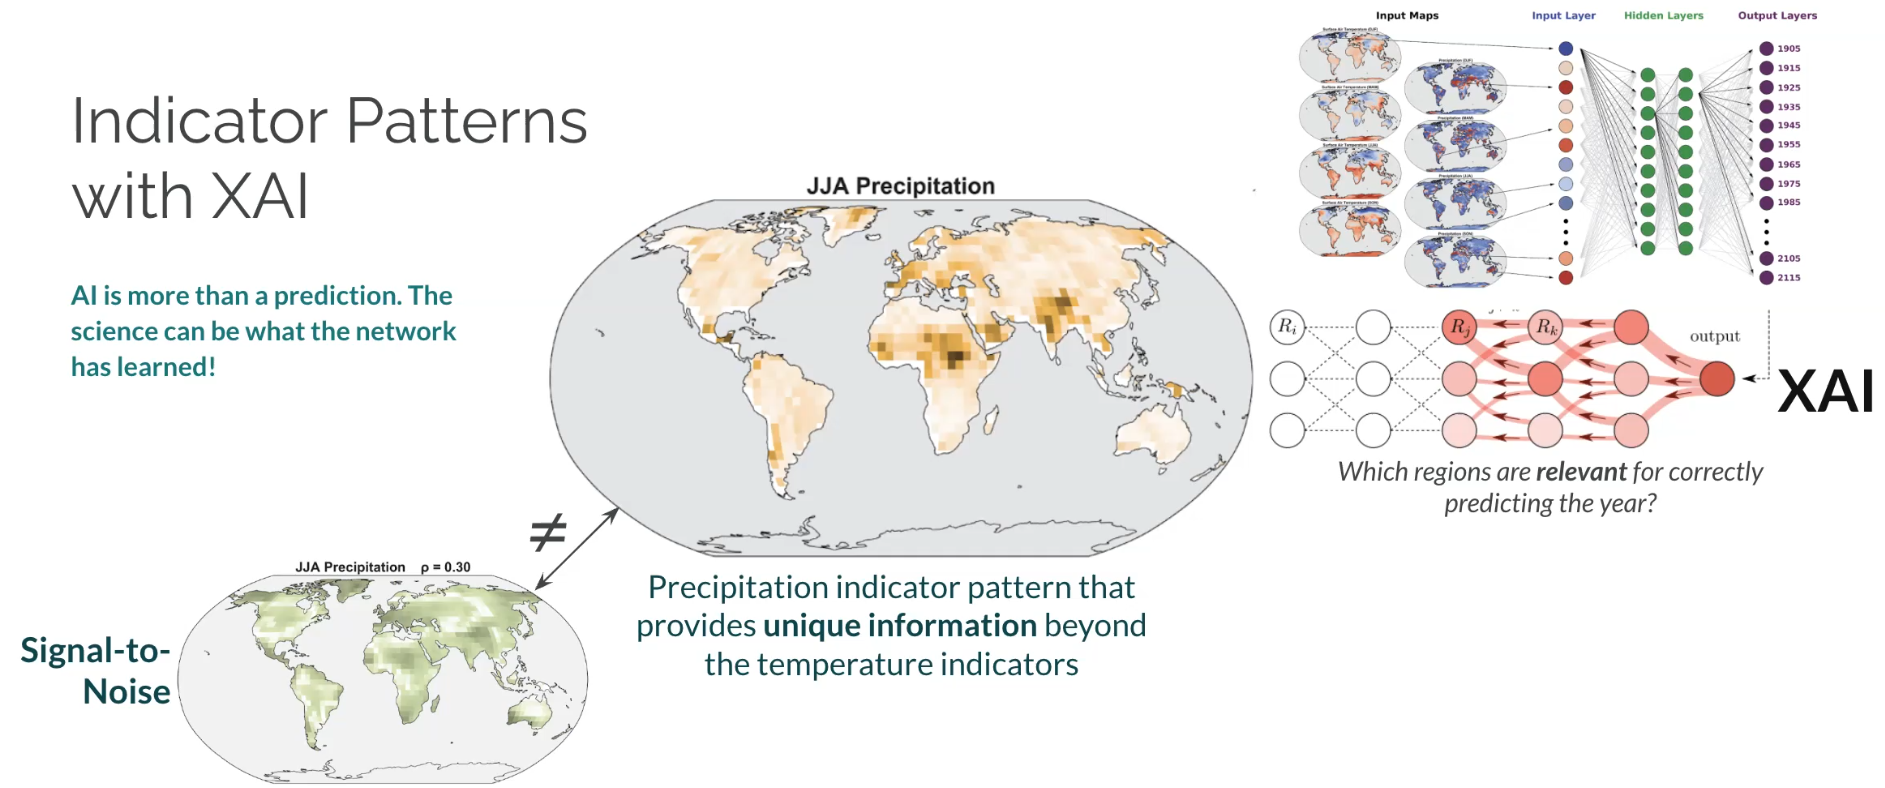

If a model performs well, has it learned relationships of scientific interest?

It is possible that the model discovered something novel.

However, models exploit **correlations** between the input features and targets... spurious relationships may improve performance even though the features are not directly related to the target. At best, XAI can be used to **generate hypothesis**.

**Video presentation (source of above graphic):**
- Explainable AI (XAI) for Climate Science: Detection, Prediction and Discovery
- Elizabeth Barnes, Colorado State University, Fort Collins
- Monday, October 31, 2022
- https://www.imsi.institute/videos/explainable-ai-xai-for-climate-science-detection-prediction-and-discovery/

# Major XAI Challenges

It very easy to run a plethora of XAI methods that are available from software repositories. But, it is also very easy to produce misleading explanations that could be worse than treating the model as a total black box.

- **Disagreements:** many XAI methods exists and their explanations might not agree. Unclear which to choose.
- **Sensitivity:** even a single method is often sensitive to various parameters
- **Lack of verification:** since we don't know the true explanation, hard to verify that the explanation is correct
- **Imbalanced data:** global explanations tend to reflect the majority class
- **Correlated features:** often violate XAI method's assumptions which may yeild misleading explanations





**Approach:**

- Triangulate methods: when multiple methods provide a similar explanation, it likely suggests something true about the models
- Think of each method as providing a clue about the model, and various XAI methods are used to investigate the model
- It is important to understand what, exactly, each method reveals about the model. Disagreements might reflect that the methods are looking at the model at different scales, for example.

**Resources:**

- [Molnar, _Interpretable Machine Learning_](https://christophmolnar.com/books/interpretable-machine-learning/)
- [McGovern et al., _Making the Black Box More Transparent: Understanding the Physical Implications of Machine Learning_](https://journals.ametsoc.org/view/journals/bams/100/11/bams-d-18-0195.1.xml)
- [Flora et al., _A Machine Learning Explainability Tutorial for Atmospheric Sciences_](https://journals.ametsoc.org/view/journals/aies/3/1/AIES-D-23-0018.1.xml)
- [Molnar et al., _General Pitfalls of Model-Agnostic Interpretation Methods for Machine Learning Models_](https://link.springer.com/chapter/10.1007/978-3-031-04083-2_4)
- [Krell et al., _Aggregation strategies to improve XAI for geoscience models that use correlated, high-dimensional rasters_](https://www.cambridge.org/core/journals/environmental-data-science/article/aggregation-strategies-to-improve-xai-for-geoscience-models-that-use-correlated-highdimensional-rasters/F6017A23BEF0BD48969225D68DF819A2)

# Concepts

- Interpretability vs Explainability
- Global vs Local Explanations
- Feature Importance (FI) vs Feature Effect (FE)

## Interpretability vs Explainability

![Graphic showing relative understandability of various machine learning techniques](https://www.ai2es.org/wp-content/uploads/2022/07/interpret_v_explain-747x500.png)

[[Fig. 1 From Flora et al. (2022, AIES)]](https://paperswithcode.com/paper/comparing-explanation-methods-for-traditional-1)

**Model Interpretability**

> The degree to which a human can derive meaning from the entire model and its components without the aid of additional methods.
[[AI2ES Glossary]](https://www.ai2es.org/products/education/glossary/interpretability/)

**Model Explainability**

> The degree to which a human can derive meaning from the entire model and its components through the use of post-hoc methods (e.g., verification, visualizations of important predictors). [[AI2ES Glossary]](https://www.ai2es.org/products/education/glossary/explainability/)

- Interpretable models are appealing since they are easier to understand
- But more complex models are often required for complex phenomena
- If your problem can be modeled using Random Forest or Linear Regression, then do so! These are relatively interpretable.
- But here, we focus on post-hoc XAI methods to investigate models that may have minimal interpretability (e.g. deep learning models)

## Global vs local explanations

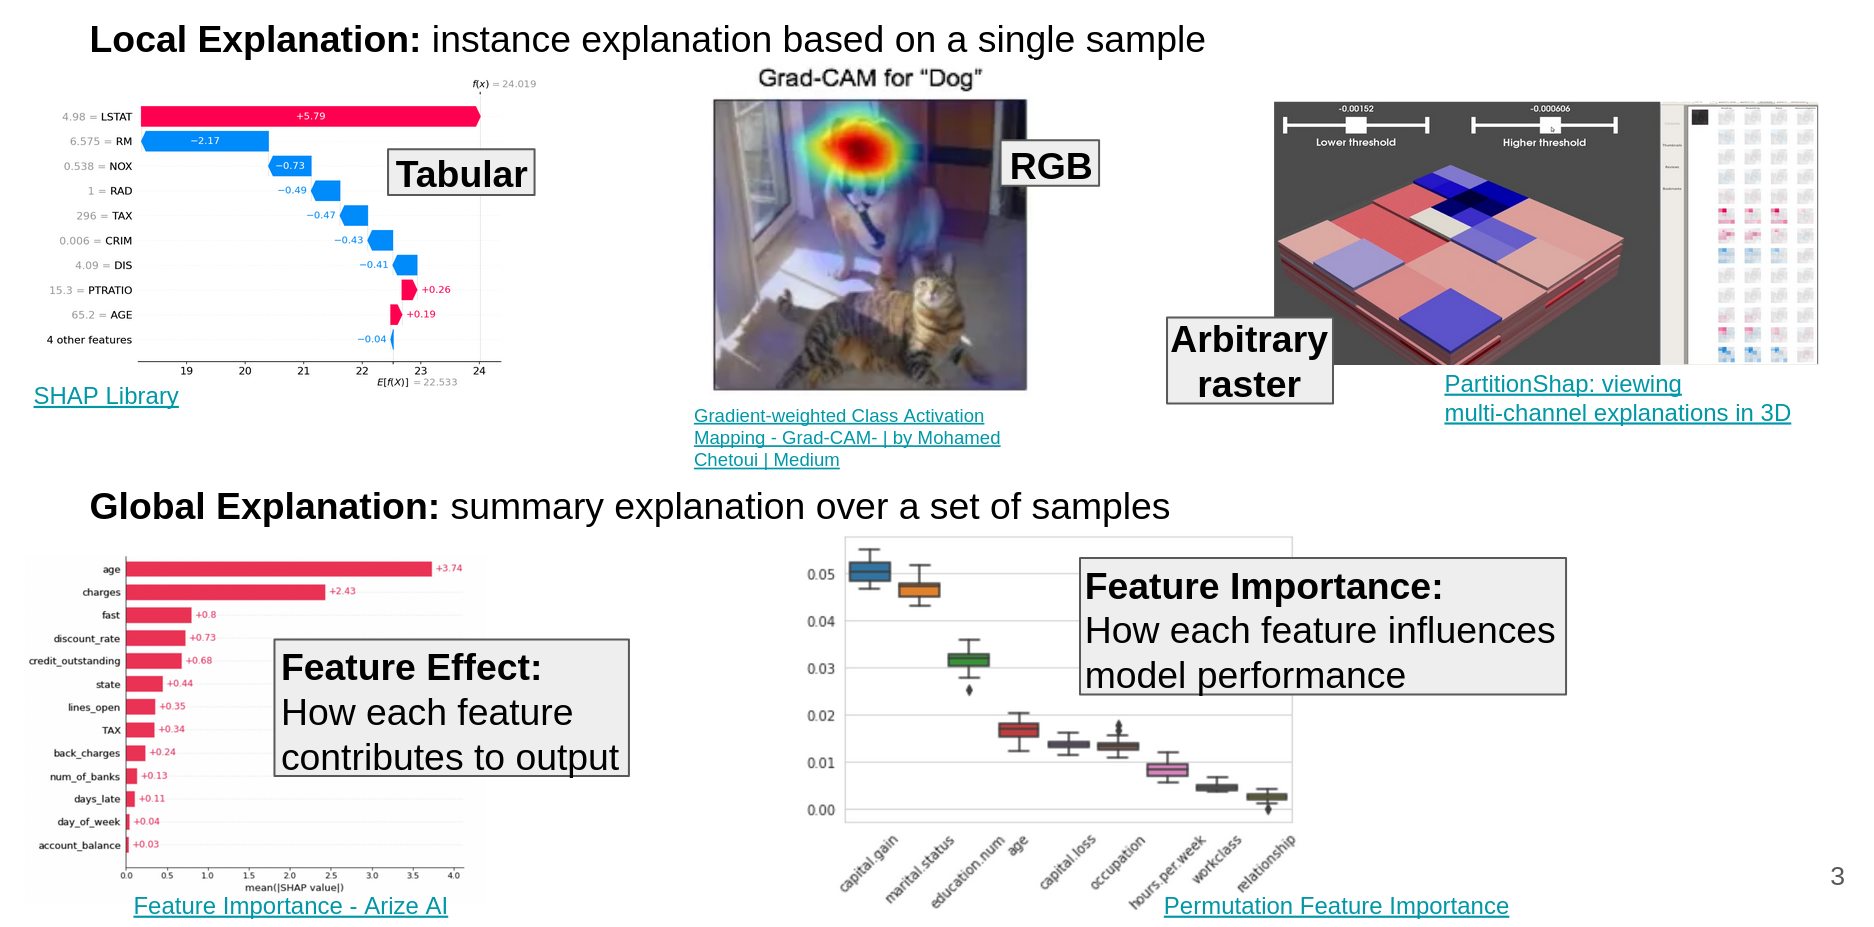

**Global Explanation**

Global explanations summarize information about the entire model based on applying an XAI method to a sizable sample of model inputs.

They answer questions about how the model works _in general_.

**Local explanation**

Local explanations are computed for an individual sample.

They describe how the model uses a particular data instance to make decisions.

**TIP:** Global explanations are popular since they give a single summary about what the model learned. With local explanations, it is hard to understand the model based on a large set of local explanations. However, global explanations tend to reflect the average model behavior. For imbalanced datasets, this means that the global explanations really explains what the model uses to make _correct reject_ decisions which we are more likely interested in what the model does when the phenomena is detected. For extreme events, e.g. storms, global explanations are unlikely to be helpful.

## Feature Importance (FI) vs Feature Effect (FE)

**Feature Importance**

With FI methods, each feature is assigned an importance score based on how that feature influences _model performance_.

FI methods are global methods since performance is based on a set of samples. FI methods measure the change in model performance (positive or negative) after modifying the input dataset in some way.

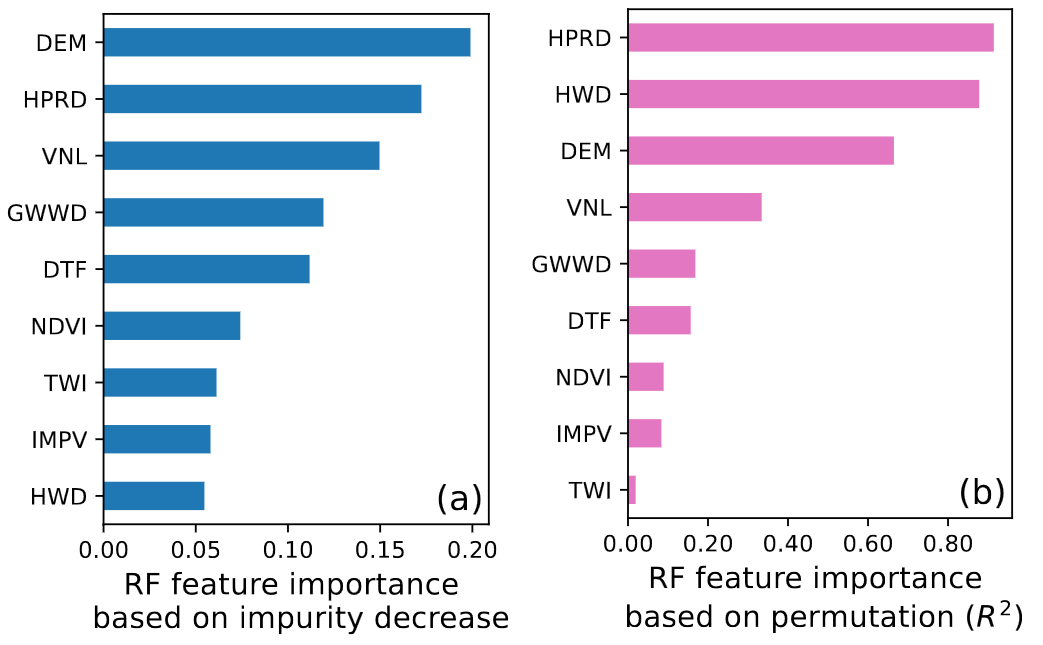

**Figure:** two global explanations created using FI techniques applied to a Random Forest model. Notice that there are discrepencies between the methods applied to the same model [Qiao et al. Submitted]().

**Feature Effect**

FE methods are based on the change in model output instead of change in model performance. Unlike FI methods, FE methods are local since they assess individual output decisions.

While FE methods are local, a set of FE-based explanations can be aggregated into global explanations. For example, by taking the mean contribution of each feature.

While FE and FI methods are related, they are quite distinct. A feature can be used by the model without helping or hurting overall predictive skill. Even an untrained model with ~0 skill will have randomly initiazed weights that the model uses. But the main appeal of FE methods is to learn what the model does in a per-situation basis instead of overall. This is ideal for investigating why the model detects lightning, hail, fog, and other phenomenon.

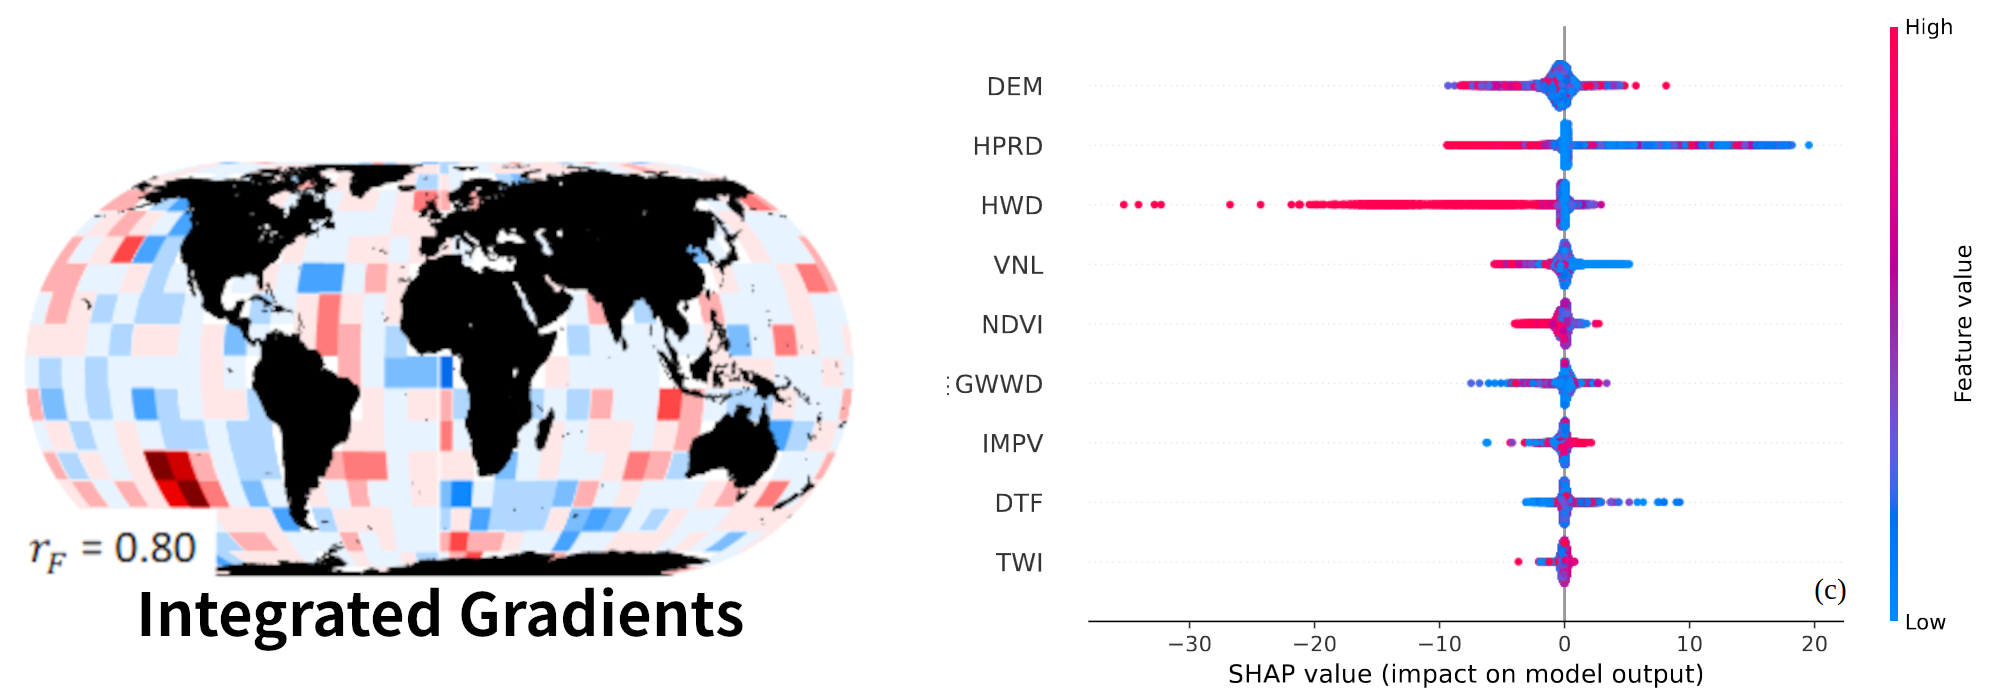

**Figure:** two explanations using FE methods. The map (left) shows a pixel-based saliency method. Red means that the pixel contributed positively toward the output and blue means away from. The strength of the color indicates the magnitude of the contribution. [Mamalakis et al.](https://www.cambridge.org/core/journals/environmental-data-science/article/neural-network-attribution-methods-for-problems-in-geoscience-a-novel-synthetic-benchmark-dataset/DDA562FC7B9A2B30710582861920860E)

The right-hand plot is an example of a global explanation created by combining FE outputs. Each FE output is plotted so that you get a sense of the frequency and magnitude of each feature's effect across a set of sample inputs. [Qiao et al. Submitted]().

# XAI Methods

- **Feature Importance**
  - Permutation Feature Importance (PFI)
- **Feature Effect**
  - SHAP
  - Pixel Attribution (Saliency Maps)


## Permutation Feature Importance (PFI)

| Backward, Single-pass     | Backward, Multi-pass |
| ----------- | ----------- |
| 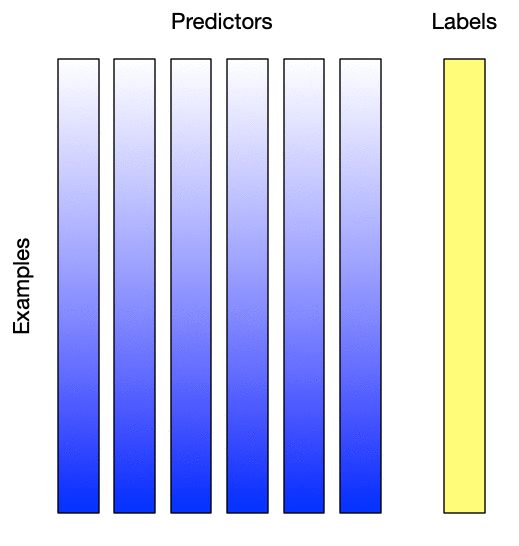      | 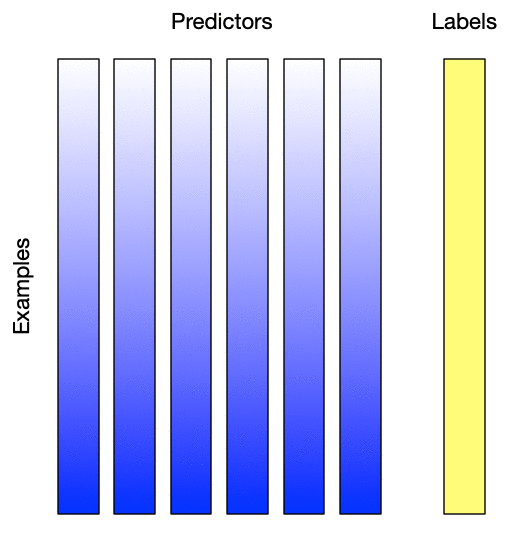      |



The goal of PFI is to rank features based on their influence on model performance. Ideally, each feature is removed to measure the change in performance using some metric such as MSE or a skill score. However, models don't support removing a feature. Instead, the feature's values are permuted to break the correlation between that feature and the target. This simulates removing the feature. Intuitively, if the feature's values don't impact performance then the model must not be using that feature to make decisions.

There are variants of PFI. Typically, when users apply PFI they are using a variant called **backward single-pass**.

**Variants**:

- **Backward vs Forward**
  - **Backward:** the features start off with their original values and each features are removed by permutation.
  - **Forward:** all features start off permuted and features are added back into the input by restoring their actual non-permuted values
- **Single-pass vs Multi-pass**
  - **Single-pass:** Each feature is evaluated one at a time to rank their importance based on how much each changed performance
  - **Multi-pass:** At each iteration, the top-ranked feature is kept permuted for the next iteration. At each iteration, the top-ranked feature is considered the next highest-ranked.

Backward Multi-pass can be very effective for explaining models whose input features are highly correlated with each other.

A more thorough discussion of these variants in included in [McGovern et al. (2019)](https://journals.ametsoc.org/view/journals/bams/100/11/bams-d-18-0195.1.xml)

## SHapley Additive Explanations (SHAP)

SHAP is a _much_ more involved algorithm in terms of both (1) computational complexity and (2) mathematical description. Here, I'll try to briefly sketch out the problem they try to solve and why this makes them so slow.

**Shapley Values**

- Shapley values come from cooperative game theory
- Their purpose is to assign credit to the players of a cooperative game, based on their contribution to the game's outcome
- So, if player **x** contributed more to winning than player **y**, **x** should receive more payment
- For XAI, a Shapley value represents **how much the player (feature) contributed to the game (model output)**

**A motivating scenario**

- Consider a game with 5 players: 2 are skilled and 3 have never played
- Either skilled player (**x1** or **x2**) are capable of winning the game on their own
- So if we remove (e.g. permute) **x1**, the team still wins the game... so the game outcome doesn't change
- If the outcome doesn't change, it looks like **x1** was not a useful player (no contribution to model output)
- But the same is true if we remove **x2**... so neither of the skilled players contribute to winning the game?
- Consider removing **x1** and **x2**: now they lose the game: clearly they were important.
- **Shapley values take into account this situation and consider all possible combinations of removing the other players when assessing each player**
- Thus, calculating Shapley values is quite robust but has **combinatorial complexity!!**

**SHAP**

- SHAP re-formulates Shapley values with a linear equation where the coefficients are the Shapley values
- Except they are now called the SHAP values
- Because sampling is used to fit that equation and extract the coefficients. So they aren't exactly Shapley values
- The feature correlations are taken into account because of the sampling over combinations of removed feature groups
- But the feature correlations are ignored when fitting the linear function, since coefficients are assumed independent

**Compared to many other XAI methods, SHAP puts great computational expense to take data correlations and relationships into account, but is not a panacea and correlated features can still influence the explanations**


**Resources**
- [Lundberg & Lee (2017): Original SHAP paper](https://dl.acm.org/doi/10.5555/3295222.3295230)
- [Molnar's chapter on SHAP (much easier to read...)](https://christophm.github.io/interpretable-ml-book/shap.html)


# Tabular Data Demo

In [21]:
!pip install scikit-explain -q

In [22]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import skexplain
import shap
import pickle
import scipy as sp
import scipy.cluster
!pip install gdown==v4.6.3

## Dataset & Model

In [23]:
# Download dataset from Google Drive
share_ids = {
    "train" : {
        "X" : "18MoywTACDH6BoZFoy5jFUoraq4vporG7",
        "Y" : "11o9qQ5VntzabN7CjXRrm-qzJL8CcFyLj",
    },
    "test" : {
        "X" : "1N6cjyjNglrhvRa1zQa33Z4WWBY7MVgrI",
        "Y" : "1FBtRjY2P0i6BvizkKGdldGMgIDbY5txg",
    }
}

for dataset in share_ids.keys():
    xid = share_ids[dataset]["X"]
    yid = share_ids[dataset]["Y"]
    !gdown $xid
    !gdown $yid
!ls

Downloading...
From: https://drive.google.com/uc?id=18MoywTACDH6BoZFoy5jFUoraq4vporG7
To: /content/Xtrain.csv
100% 88.4M/88.4M [00:00<00:00, 111MB/s]
Downloading...
From: https://drive.google.com/uc?id=11o9qQ5VntzabN7CjXRrm-qzJL8CcFyLj
To: /content/Ytrain.csv
100% 31.7k/31.7k [00:00<00:00, 66.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1N6cjyjNglrhvRa1zQa33Z4WWBY7MVgrI
To: /content/Xtest.csv
100% 38.2M/38.2M [00:00<00:00, 85.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1FBtRjY2P0i6BvizkKGdldGMgIDbY5txg
To: /content/Ytest.csv
100% 12.9k/12.9k [00:00<00:00, 41.4MB/s]
ams2024_xai_1_pfi-backward-multipass.pickle   sample_data  Ytest.csv
ams2024_xai_1_pfi-backward-singlepass.pickle  Xtest.csv    Ytrain.csv
ams2024_xai_1_shap-correctreject.pickle       Xtrain.csv


In [24]:
# Load dataset
def load_dataset(X_file, Y_file):
  # Load files
  X_ = pd.read_csv(X_file)
  Y_ = pd.read_csv(Y_file)

  X_ = X_.iloc[:, 0:800]   # For this notebook, we'll only use 800 features

  # Feature names
  feature_names = list(X_.columns.values)

  # Normalize features
  normalizer = MinMaxScaler(feature_range=(-1, 1)).fit(X_)
  X = normalizer.fit_transform(X_)

  # Binarize target
  y = np.where(Y_["Cat"] <= 0, 1, 0)

  # Get indices of all fog cases
  fog_idxs = np.where(y == 1)[0]

  return X, y, feature_names

X_train, y_train, feature_names = load_dataset("Xtrain.csv", "Ytrain.csv")
X_test, y_test, feature_names = load_dataset("Xtest.csv", "Ytest.csv")

**Target distribution**

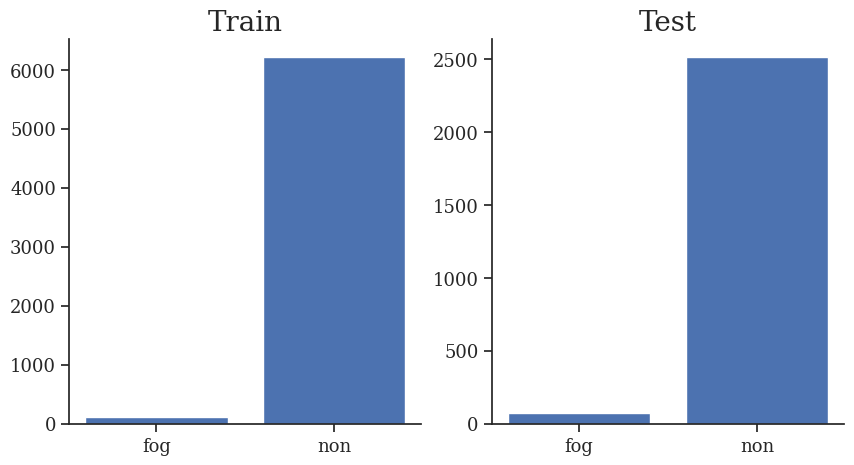

In [25]:
n_fog_train = np.sum(y_train == 1)
n_non_train = np.sum(y_train == 0)

n_fog_test = np.sum(y_test == 1)
n_non_test = np.sum(y_test == 0)

fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].bar(["fog", "non"], [n_fog_train, n_non_train])
axs[0].set_title("Train", fontsize=20)
axs[1].bar(["fog", "non"], [n_fog_test, n_non_test])
axs[1].set_title("Test", fontsize=20)

for ax in axs:
  for label in (ax.get_xticklabels() + ax.get_yticklabels()):
      label.set_fontsize(13) # Size here overrides font_prop

In [26]:
# Train model
clf = MLPClassifier(hidden_layer_sizes=100, alpha=1, max_iter=1000, random_state=42)
clf.fit(X_train, y_train)

MLPClassifier(alpha=1, hidden_layer_sizes=100, max_iter=1000, random_state=42)

In [27]:
# Evaluate model
def check_preds(m, X, y):
  idxs = np.where(y == 1)[0]
  n_preds = idxs.shape[0]
  n_correct = np.sum(m.predict(X[idxs]) == y[idxs])
  print("{} / {}   ({})".format(n_correct, n_preds, n_correct / n_preds))

score_train = clf.score(X_train, y_train)
score_test = clf.score(X_test, y_test)
print("Train accuracy = {}".format(score_train))
print("Fog cases only:")
check_preds(clf, X_train, y_train)
print("")
print("Test accuracy = {}".format(score_test))
print("Fog cases only:")
check_preds(clf, X_test, y_test)

Train accuracy = 0.9842096952471183
Fog cases only:
20 / 115   (0.17391304347826086)

Test accuracy = 0.9729416312330885
Fog cases only:
31 / 71   (0.43661971830985913)


**Confusion matrix**

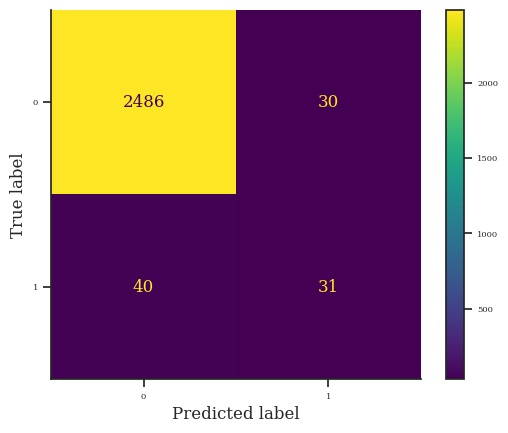

In [28]:
cm = confusion_matrix(y_test, clf.predict(X_test))
disp = ConfusionMatrixDisplay(cm, display_labels=None)
disp.plot()
plt.show()

## Feature Importance Methods

### Permutation Feature Importance

- Documentation
- Tutorial: https://github.com/monte-flora/scikit-explain/blob/master/tutorial_notebooks/permutation_importance_tutorial.ipynb

**Backward Single-Pass**


In [29]:
estimators = [('MLP', clf)]
explainer = skexplain.ExplainToolkit(estimators,X=X_test, y=y_test, feature_names=feature_names)

In [30]:
USE_ONLINE_CACHE = True

if USE_ONLINE_CACHE:
  !wget "https://github.com/ekrell/ams_ai_shortcourse_2024/raw/main/data/ams2024_xai_1_pfi-backward-singlepass.pickle"
  with open('ams2024_xai_1_pfi-backward-singlepass.pickle', 'rb') as handle:
      results = pickle.load(handle)
else:
  results = explainer.permutation_importance(
                                           n_vars=1,
                                           evaluation_fn='mse',
                                           n_permute=3,
                                           subsample=0.1,
                                           n_jobs=8,
                                           verbose=True,
                                           random_seed=42,
                                           direction='backward',
                                              )
  # with open('ams2024_xai_1_pfi-backward-singlepass.pickle', 'wb') as handle:
  #   pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)

--2024-01-22 03:21:48--  https://github.com/ekrell/ams_ai_shortcourse_2024/raw/main/data/ams2024_xai_1_pfi-backward-singlepass.pickle
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ekrell/ams_ai_shortcourse_2024/main/data/ams2024_xai_1_pfi-backward-singlepass.pickle [following]
--2024-01-22 03:21:48--  https://raw.githubusercontent.com/ekrell/ams_ai_shortcourse_2024/main/data/ams2024_xai_1_pfi-backward-singlepass.pickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107160 (105K) [application/octet-stream]
Saving to: ‘ams2024_xai_1_pfi-backward-singlepass.pickle.1’

ams2024_xai_1_pfi-b 100%[==

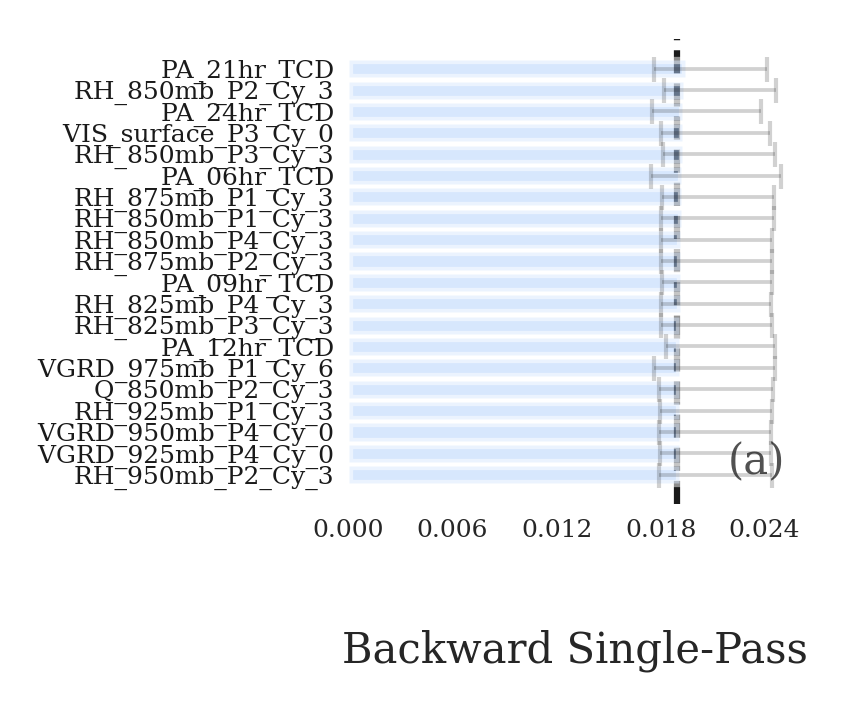

In [31]:
fig = explainer.plot_importance(data=results,
                                panels=[('backward_singlepass', 'MLP')],
                                num_vars_to_plot=20,
                                 )

**Backward Multi-Pass**

In [32]:
USE_ONLINE_CACHE = True

if USE_ONLINE_CACHE:
  !wget "https://github.com/ekrell/ams_ai_shortcourse_2024/raw/main/data/ams2024_xai_1_pfi-backward-multipass.pickle"
  with open('ams2024_xai_1_pfi-backward-multipass.pickle', 'rb') as handle:
      results = pickle.load(handle)
else:
  results = explainer.permutation_importance(
                                           n_vars=5,  # Change from single-pass (1) to multi-pass
                                           evaluation_fn='mse',
                                           n_permute=3,
                                           subsample=0.1,
                                           n_jobs=8,
                                           verbose=True,
                                           random_seed=42,
                                           direction='backward',
                                              )
  # with open('ams2024_xai_1_pfi-backward-multipass.pickle', 'wb') as handle:
    # pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)


--2024-01-22 03:21:50--  https://github.com/ekrell/ams_ai_shortcourse_2024/raw/main/data/ams2024_xai_1_pfi-backward-multipass.pickle
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ekrell/ams_ai_shortcourse_2024/main/data/ams2024_xai_1_pfi-backward-multipass.pickle [following]
--2024-01-22 03:21:51--  https://raw.githubusercontent.com/ekrell/ams_ai_shortcourse_2024/main/data/ams2024_xai_1_pfi-backward-multipass.pickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107160 (105K) [application/octet-stream]
Saving to: ‘ams2024_xai_1_pfi-backward-multipass.pickle.1’

ams2024_xai_1_pfi-b 100%[======

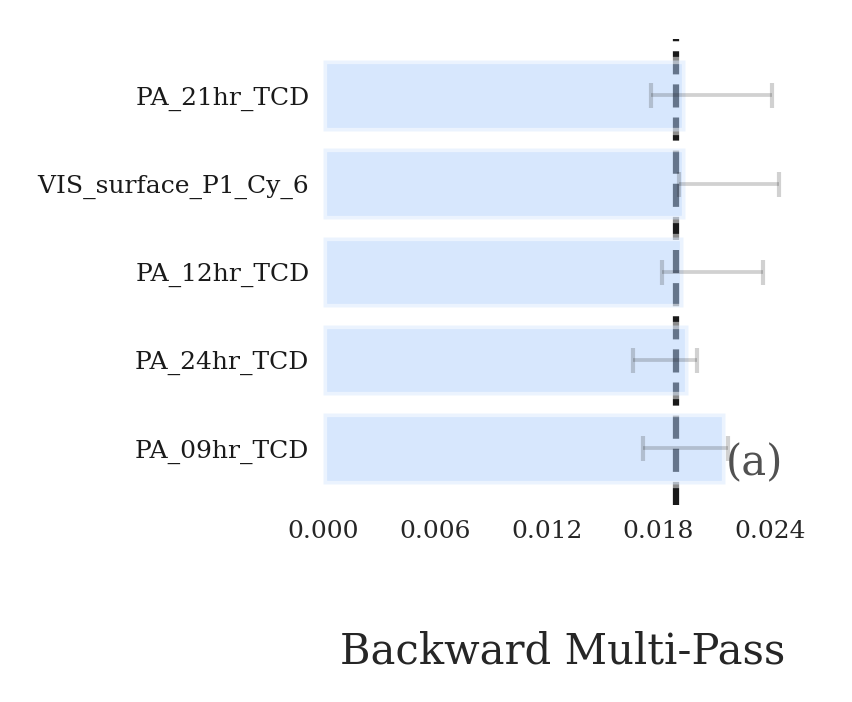

In [33]:
fig = explainer.plot_importance(data=results,
                                panels=[('backward_multipass', 'MLP')],
                                num_vars_to_plot=20,
                                 )

## Feature Effect Methods

### SHAP

In [34]:
# Setup SHAP explainer
explainer = shap.KernelExplainer(clf.predict, data=shap.kmeans(X_test, 50))

In [35]:
# Explain a single outcome
shap_values_single = explainer.shap_values(X_test[0,:], nsamples=10000)

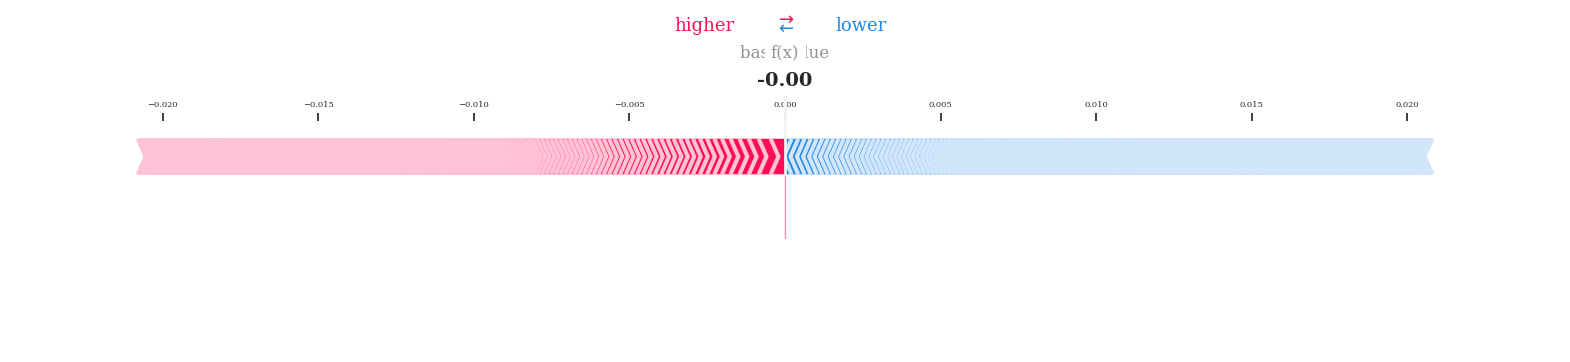

In [36]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_single, matplotlib=matplotlib)

In [37]:
# Outcome types
fog_idxs = np.where(y_test == 1)[0]
fog_preds = clf.predict(X_test[fog_idxs])

# Hit indices
hit_idxs_ = np.where(fog_preds == 1)[0]
hit_idxs = fog_idxs[hit_idxs_]

# Miss indices
miss_idxs_ = np.where(fog_preds == 0)[0]
miss_idxs = fog_idxs[miss_idxs_]

# Correct reject indices
n_cr = 30
non_idxs = np.where(y_test == 0)[0]
non_preds = clf.predict(X_test[non_idxs])
cr_idxs_ = np.where(non_preds == 0)[0]
np.random.shuffle(cr_idxs_)
cr_idxs = cr_idxs_[:n_cr]

In [38]:
# Explain (some) correct rejects (the majority outcome)
USE_ONLINE_CACHE = True

if USE_ONLINE_CACHE:
  !wget "https://github.com/ekrell/ams_ai_shortcourse_2024/raw/main/data/ams2024_xai_1_shap-correctreject.pickle"
  with open('ams2024_xai_1_shap-correctreject.pickle', 'rb') as handle:
      shap_values_crs = pickle.load(handle)
else:
  # shap_values_crs = explainer.shap_values(X_test[cr_idxs,:], nsamples=10000)
  with open('ams2024_xai_1_shap-correctreject.pickle', 'wb') as handle:
      pickle.dump(shap_values_crs, handle, protocol=pickle.HIGHEST_PROTOCOL)

--2024-01-22 03:22:12--  https://github.com/ekrell/ams_ai_shortcourse_2024/raw/main/data/ams2024_xai_1_shap-correctreject.pickle
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ekrell/ams_ai_shortcourse_2024/main/data/ams2024_xai_1_shap-correctreject.pickle [following]
--2024-01-22 03:22:12--  https://raw.githubusercontent.com/ekrell/ams_ai_shortcourse_2024/main/data/ams2024_xai_1_shap-correctreject.pickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 192138 (188K) [application/octet-stream]
Saving to: ‘ams2024_xai_1_shap-correctreject.pickle.1’

ams2024_xai_1_shap- 100%[===================>] 

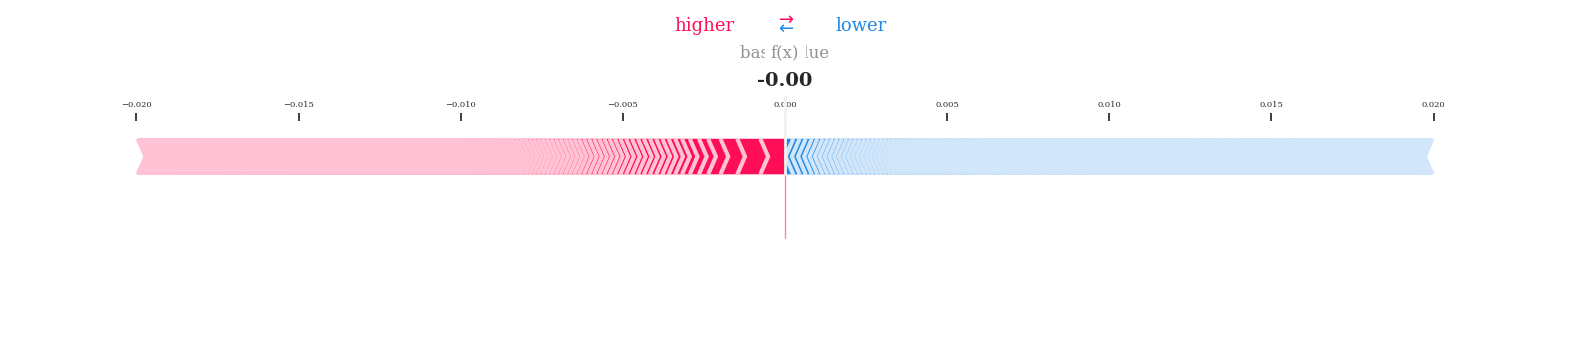

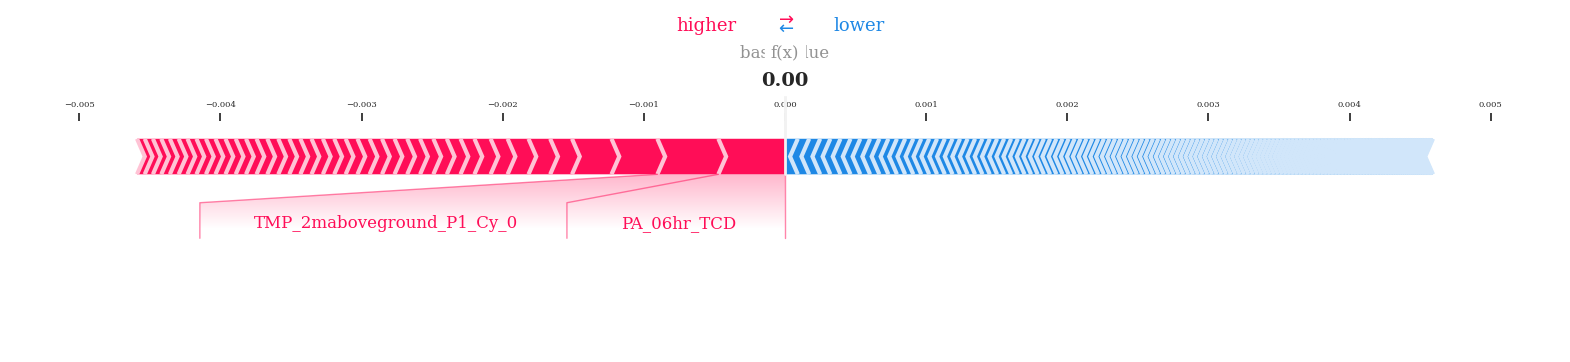

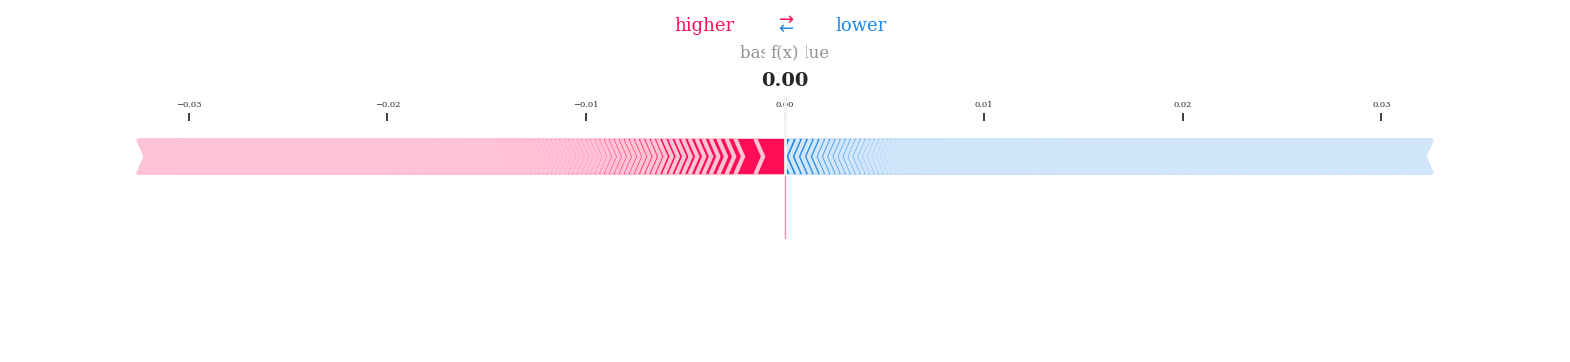

In [39]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_crs[0], matplotlib=matplotlib, feature_names=feature_names)
shap.force_plot(explainer.expected_value, shap_values_crs[1], matplotlib=matplotlib, feature_names=feature_names)
shap.force_plot(explainer.expected_value, shap_values_crs[2], matplotlib=matplotlib, feature_names=feature_names)

In [40]:
# Explain hits
USE_ONLINE_CACHE = True

if USE_ONLINE_CACHE:
  !wget "https://github.com/ekrell/ams_ai_shortcourse_2024/raw/main/data/ams2024_xai_1_shap-hit.pickle"
  with open('ams2024_xai_1_shap-hit.pickle', 'rb') as handle:
      shap_values_hits = pickle.load(handle)
else:
  # shap_values_hits = explainer.shap_values(X_test[hit_idxs,:], nsamples=10000)
  with open('ams2024_xai_1_shap-hit.pickle', 'wb') as handle:
      pickle.dump(shap_values_hits, handle, protocol=pickle.HIGHEST_PROTOCOL)

--2024-01-22 03:22:15--  https://github.com/ekrell/ams_ai_shortcourse_2024/raw/main/data/ams2024_xai_1_shap-hit.pickle
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ekrell/ams_ai_shortcourse_2024/main/data/ams2024_xai_1_shap-hit.pickle [following]
--2024-01-22 03:22:15--  https://raw.githubusercontent.com/ekrell/ams_ai_shortcourse_2024/main/data/ams2024_xai_1_shap-hit.pickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 198538 (194K) [application/octet-stream]
Saving to: ‘ams2024_xai_1_shap-hit.pickle’

ams2024_xai_1_shap- 100%[===================>] 193.88K  --.-KB/s    in 0.03s   

2024-01-

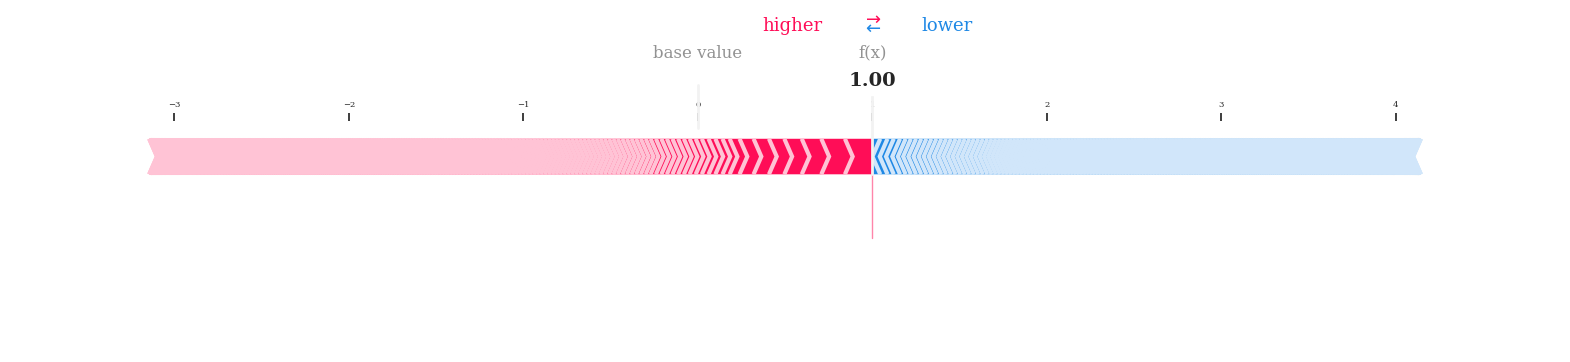

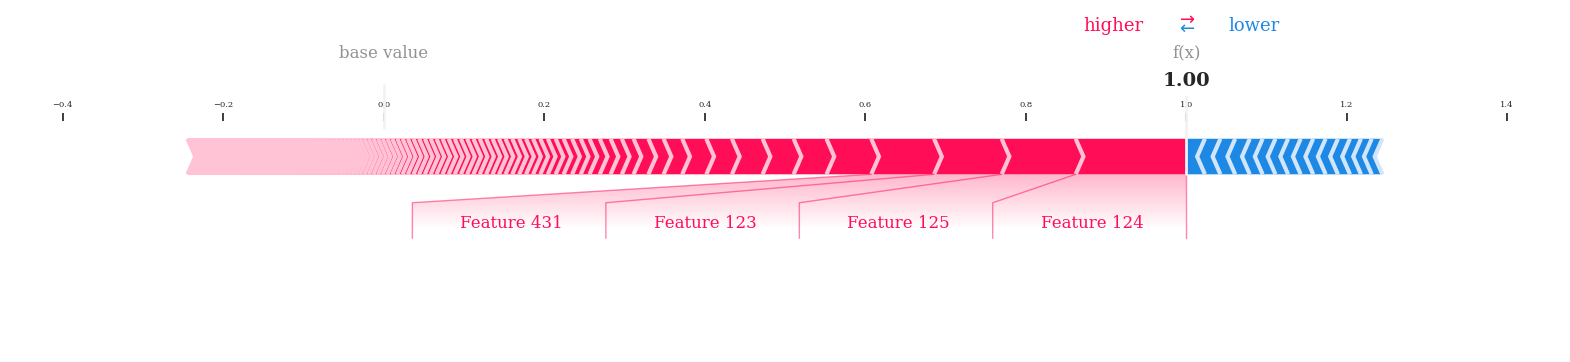

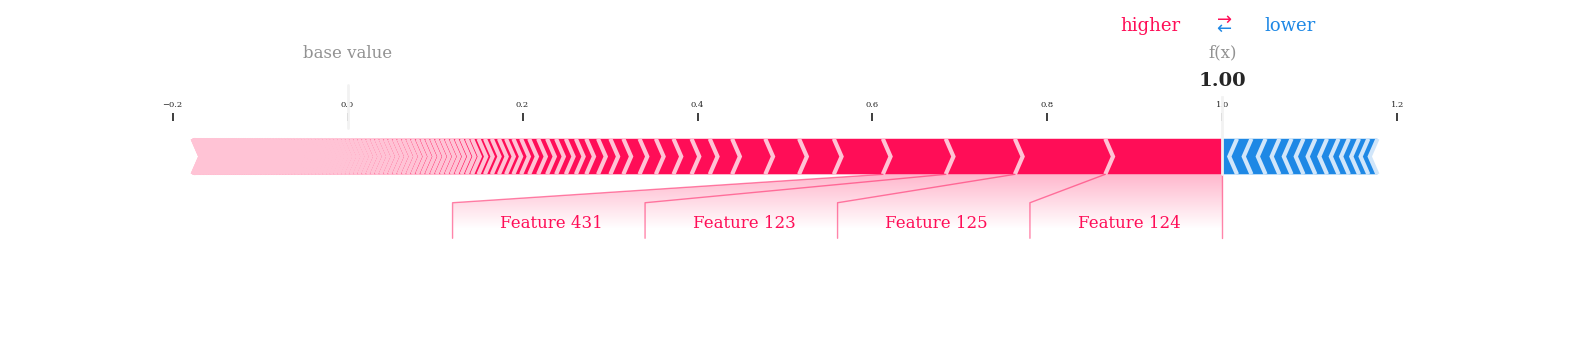

In [41]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_hits[0], matplotlib=matplotlib)
shap.force_plot(explainer.expected_value, shap_values_hits[1], matplotlib=matplotlib)
shap.force_plot(explainer.expected_value, shap_values_hits[2], matplotlib=matplotlib)

In [42]:
# Explain misses
USE_ONLINE_CACHE = True

if USE_ONLINE_CACHE:
  !wget "https://github.com/ekrell/ams_ai_shortcourse_2024/raw/main/data/ams2024_xai_1_shap-miss.pickle"
  with open('ams2024_xai_1_shap-miss.pickle', 'rb') as handle:
      shap_values_misses = pickle.load(handle)
else:
  shap_values_misses = explainer.shap_values(X_test[miss_idxs,:], nsamples=10000)
  with open('ams2024_xai_1_shap-miss.pickle', 'wb') as handle:
      pickle.dump(shap_values_misses, handle, protocol=pickle.HIGHEST_PROTOCOL)

--2024-01-22 03:22:18--  https://github.com/ekrell/ams_ai_shortcourse_2024/raw/main/data/ams2024_xai_1_shap-miss.pickle
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ekrell/ams_ai_shortcourse_2024/main/data/ams2024_xai_1_shap-miss.pickle [following]
--2024-01-22 03:22:18--  https://raw.githubusercontent.com/ekrell/ams_ai_shortcourse_2024/main/data/ams2024_xai_1_shap-miss.pickle
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256138 (250K) [application/octet-stream]
Saving to: ‘ams2024_xai_1_shap-miss.pickle’

ams2024_xai_1_shap- 100%[===================>] 250.13K  --.-KB/s    in 0.03s   

2024

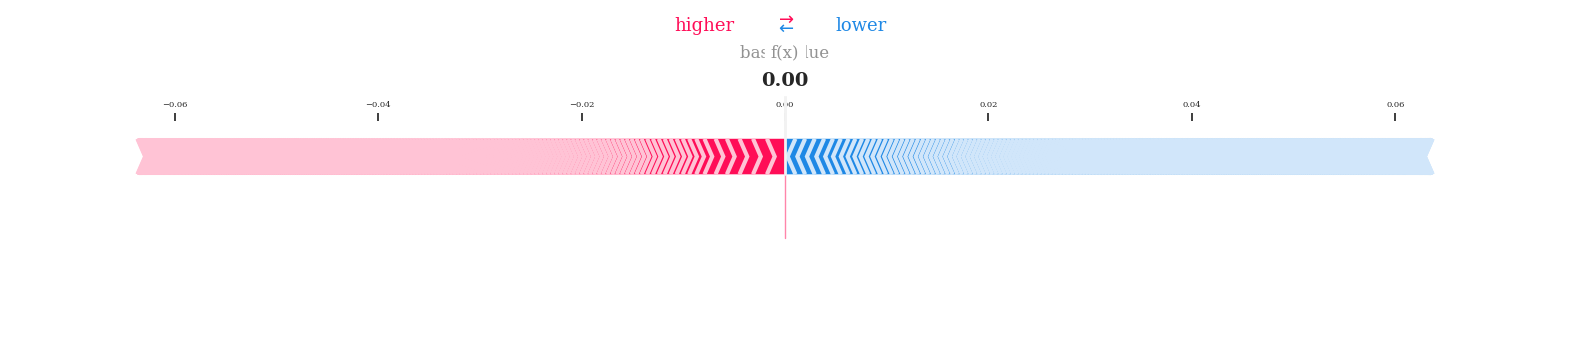

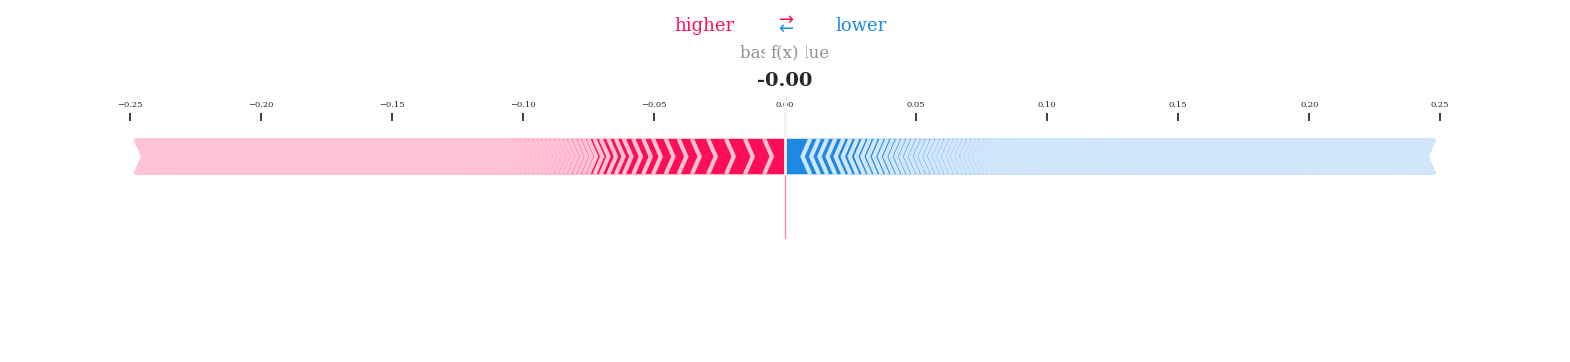

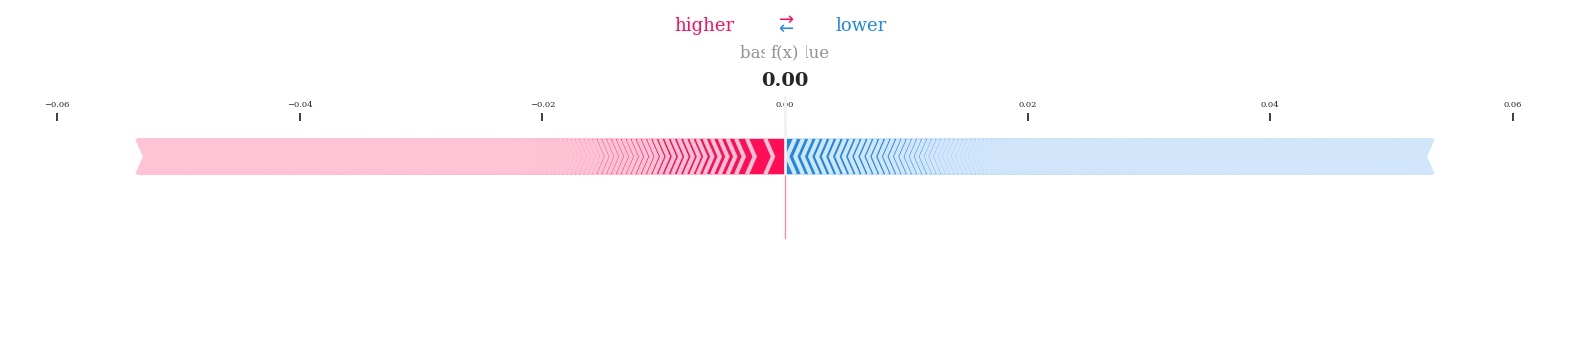

In [43]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_misses[0], matplotlib=matplotlib)
shap.force_plot(explainer.expected_value, shap_values_misses[1], matplotlib=matplotlib)
shap.force_plot(explainer.expected_value, shap_values_misses[2], matplotlib=matplotlib)

#### Aggregating Local into Global Explanations

**Correct Rejects**

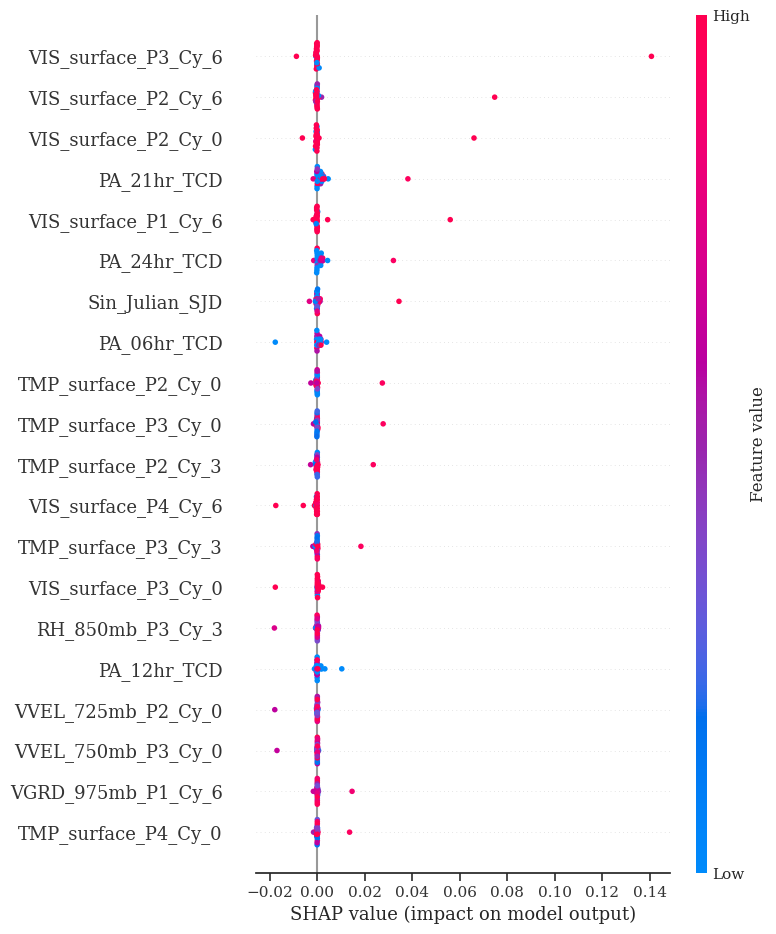

In [44]:
shap.summary_plot(shap_values_crs, X_test[cr_idxs,:], feature_names=feature_names)

**Hits**

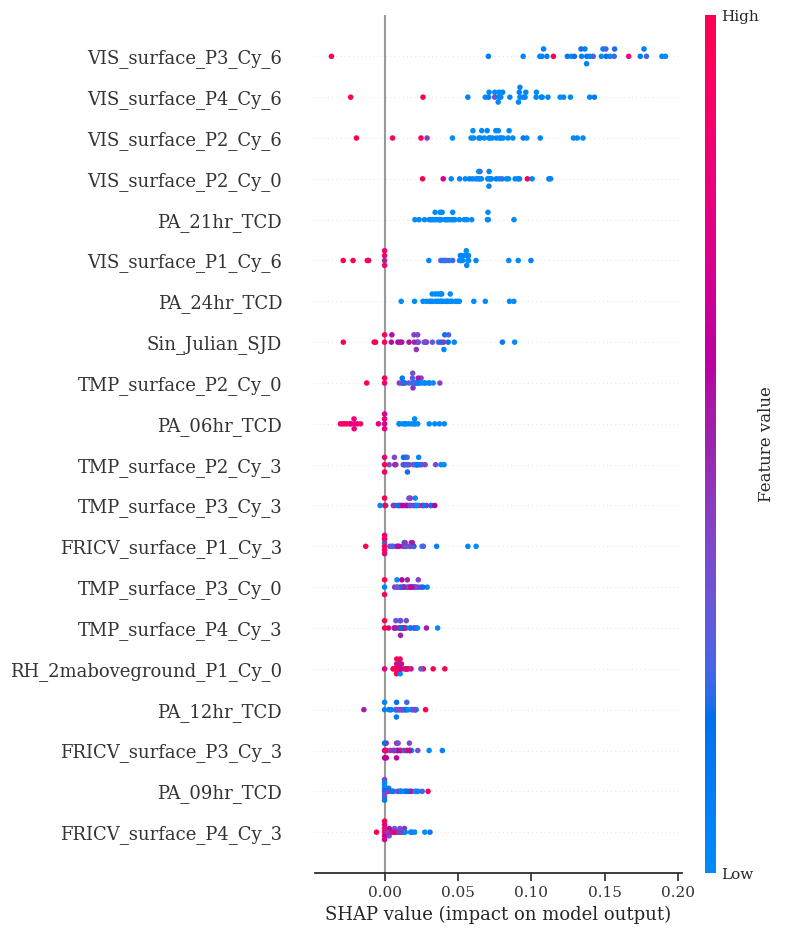

In [45]:
shap.summary_plot(shap_values_hits, X_test[hit_idxs,:], feature_names=feature_names)

**Misses**

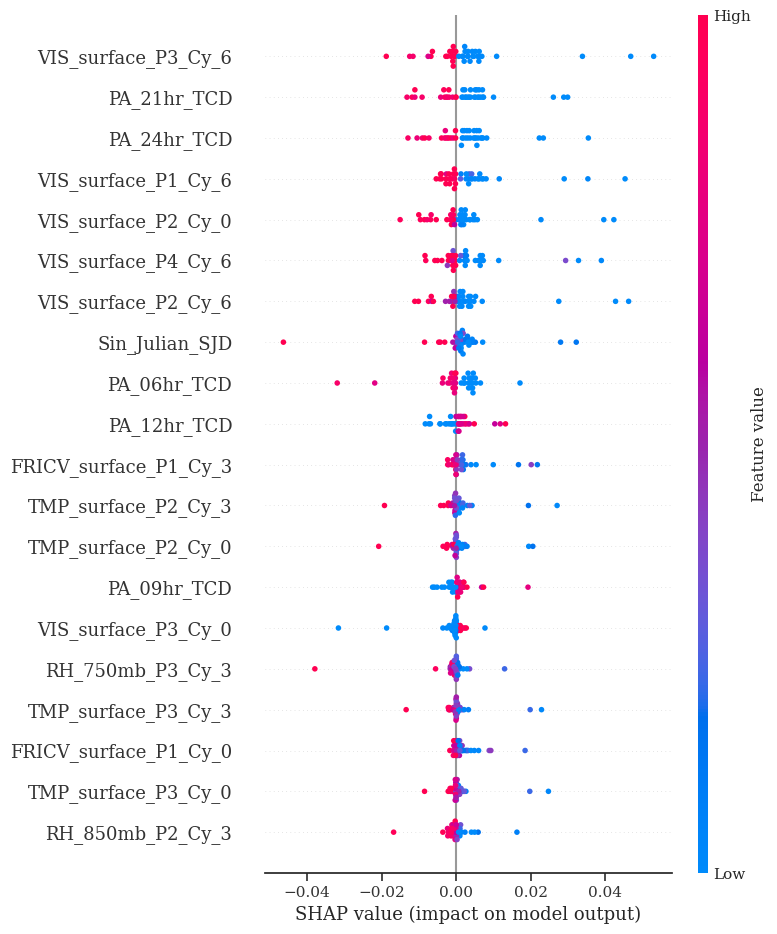

In [46]:
shap.summary_plot(shap_values_misses, X_test[miss_idxs,:], feature_names=feature_names)

### PartitionSHAP

**Dealing with correlated features**

- SHAP does not fully take correlated features into consideration
- Correlated features can impact the explanations
  - Perhaps the top N features are really just a set of very similar features. Repetitive information.
  - Or, the model did not use feature X1 only because it is so similar to X2 that the model could rely only on X2
  - Or, the model considers both X1 and X2 so that their individual influence is low, but their combined influence is high

  **PartitionSHAP can be used to explain groups of correlated features.**

  - Given a partition tree (cluster dendogram), PartitionSHAP computes SHAP values in a hierarchical fashion.
  - It starts with the 2 groups of most-distant (least correlated) separation of the featurs
  - And it traverses the tree to evaluate more and more similar features
  - Importantly, a feature's final SHAP value includes the values calculated at higher levels of the tree
  - So, each feature's SHAP value take into account these grouped features based on correlation

  The following code borrows extensively from the [PartitionSHAP documentation tutorial](https://shap-lrjball.readthedocs.io/en/latest/example_notebooks/partition_explainer/Simple%20Boston%20Demo.html). However, the documentation is out of date and does not actually work with the latest SHAP.

In [47]:
X = X_test
X.shape

(2587, 800)

In [48]:
distances = sp.spatial.distance.pdist(X, metric="correlation")
cluster_matrix = sp.cluster.hierarchy.complete(distances)

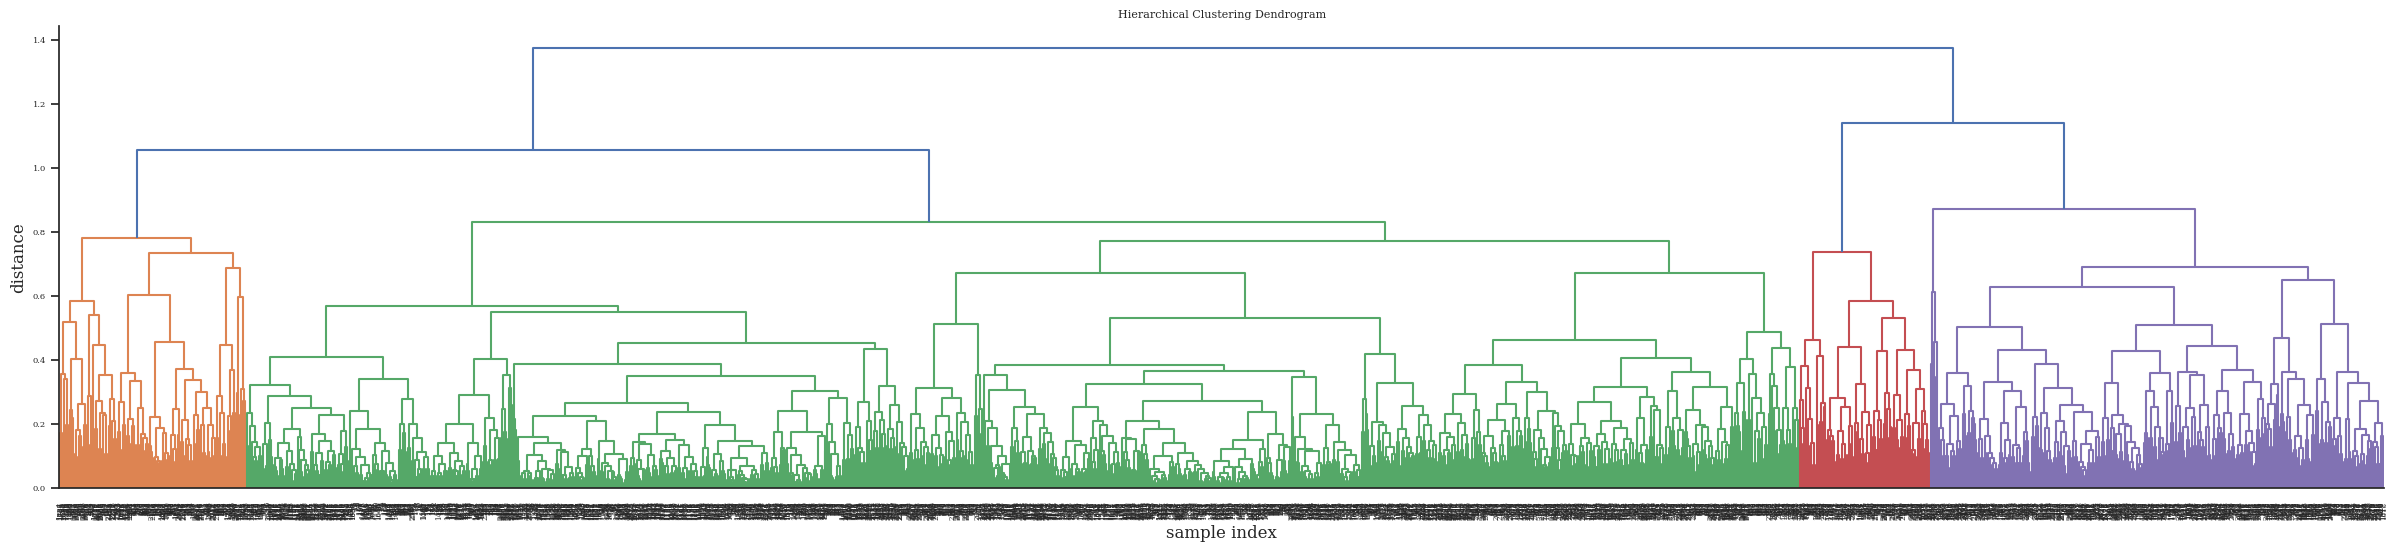

In [49]:
# plot the clustering
plt.figure(figsize=(30, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
sp.cluster.hierarchy.dendrogram(
    cluster_matrix,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=5.,  # font size for the x axis labels
    # labels=X.columns
)
plt.show()

In [50]:
x = X[0:1,:]
refs = shap.kmeans(X, 50)

In [51]:
e_p = shap.Explainer(clf.predict, X, partition_tree=cluster_matrix)
shap_values_p = e_p(x, max_evals=10000)

PermutationExplainer explainer: 2it [00:11, 11.64s/it]               


In [52]:
e_n = shap.KernelExplainer(clf.predict, refs)
shap_values_n = e_n(x)

  0%|          | 0/1 [00:00<?, ?it/s]

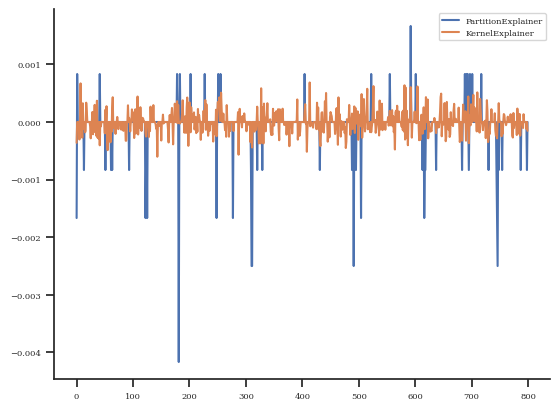

In [53]:
plt.plot(shap_values_p[0], label="PartitionExplainer")
plt.plot(shap_values_n[0], label="KernelExplainer")
plt.legend()

**Top N features**

In [54]:
N = 10

In [55]:
df_topN = pd.DataFrame()

rank_p = np.argsort(-np.abs(shap_values_p.values))[0]
rank_p = rank_p[0:N]
features_p = np.array(feature_names)[rank_p]
values_p = shap_values_p.values[0][rank_p]
df_topN["partition_features"] = features_p
df_topN["partition_values"] = values_p

rank_n = np.argsort(-np.abs(shap_values_n.values))[0]
rank_n = rank_n[0:N]
features_n = np.array(feature_names)[rank_n]
values_n = shap_values_n.values[0][rank_n]
df_topN["kernel_features"] = features_n
df_topN["kernel_values"] = values_n

In [56]:
df_topN

partition_features  partition_values     kernel_features  \
0             Sin_Julian_SJD         -0.004167  VGRD_900mb_P2_Cy_0   
1        TMP_surface_P4_Cy_3         -0.002500         BH_21hr_TCD   
2        TMP_surface_P3_Cy_0         -0.002500    RH_775mb_P4_Cy_3   
3      FRICV_surface_P1_Cy_3         -0.002500     Q_825mb_P2_Cy_3   
4        TMP_surface_P4_Cy_0         -0.002500    RH_925mb_P1_Cy_3   
5  DPT_2maboveground_P2_Cy_0         -0.001667    RH_850mb_P2_Cy_3   
6        TMP_surface_P3_Cy_3         -0.001667  VVEL_775mb_P4_Cy_6   
7        VIS_surface_P4_Cy_6         -0.001667     Q_900mb_P3_Cy_0   
8      FRICV_surface_P1_Cy_0         -0.001667  UGRD_750mb_P2_Cy_0   
9                PA_12hr_TCD         -0.001667     Q_750mb_P4_Cy_3   

   kernel_values  
0       0.000686  
1       0.000671  
2       0.000637  
3       0.000623  
4       0.000617  
5       0.000605  
6      -0.000603  
7       0.000598  
8       0.000585  
9       0.000577

## Exercise: Compare SHAP and PartitionSHAP Rankings

**Task:** check how the ranking of each feature depends on the choice of XAI method.

1. Run SHAP and PartitionSHAP on the first sample in `X_test`
2. Create a `pandas` DataFrame with three columns:
  1. `feature_name`: the name of the feature
  2. `shap_rank`: the feature's ranking according to SHAP
  3. `pshap_rank`: the feature's ranking according to PartitionSHAP
3. Create an additional column, `distance`, that has the difference between the feature' SHAP and PartitionSHAP rankings
4. Plot the distance column to see the agreement between rankings
5. Convert the above to a function that takes in sample index to perform the comparison on any sample